In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

os.chdir("C:\\Dev\\Smart Car Project\\auton-car-nnetwork\\data")

from src.preprocess import model as md, dataset_load
from sklearn.metrics import mean_squared_error

c:\program files\python38\lib\site-packages\tensorflow\python\keras\layers\core.py:1057: UserWarning: src.nnetwork.model is not loaded, but a Lambda layer uses it. It may cause errors.
  warnings.warn('{} is not loaded, but a Lambda layer uses it. '


Found 304 non-validated image filenames.
Found 304 non-validated image filenames.
Found 304 non-validated image filenames.
Found 304 non-validated image filenames.
Found 304 non-validated image filenames.


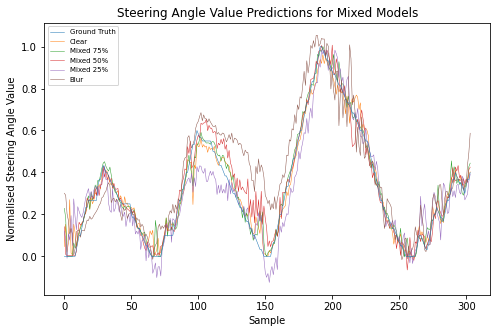

In [9]:
# RESULTS GRAPH NO. 8a - NEW
datasets = ["self-made", "mixed-75", "mixed-50", "mixed-25", "self-made-blur2"]
model_names = ["model-063-0.004", "model-065-0.004", "model-069-0.004", "model-066-0.005", "model-069-0.003"]
plot_labels = ["Clear", "Mixed 75%", "Mixed 50%", "Mixed 25%", "Blur"]
preds_list = [None] * len(model_names)
labels = []

for index, (dataset, name) in enumerate(zip(datasets, model_names)):
    model = md.load_model(dataset, "Model-s41-e70", name)
    dataset_df = dataset_load(dataset, "dataset-aug.csv")
    preds_list[index], labels, _ = md.get_predictions("self-made", model, dataset_df, (240, 320), percentage=0.005, seed=40)

md.plot_predictions("graphs", preds_list, plot_labels, labels, "No 8a - Mixed Models Predictions My Dataset.png",
                    linewidth=0.5, fontsize="x-small", title='Steering Angle Value Predictions for Mixed Models',
                    figsize=(8, 5))

c:\program files\python38\lib\site-packages\tensorflow\python\keras\layers\core.py:1057: UserWarning: src.nnetwork.model is not loaded, but a Lambda layer uses it. It may cause errors.
  warnings.warn('{} is not loaded, but a Lambda layer uses it. '


Found 30420 non-validated image filenames.
Found 30420 non-validated image filenames.
Found 30420 non-validated image filenames.
Found 30420 non-validated image filenames.
Found 30420 non-validated image filenames.
Found 30420 non-validated image filenames.
Found 30420 non-validated image filenames.
Found 30420 non-validated image filenames.
Found 30420 non-validated image filenames.
Found 30420 non-validated image filenames.


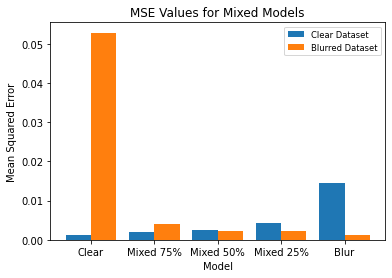

In [3]:
import matplotlib.pyplot as plt
import numpy as np

datasets = ["self-made", "mixed-75", "mixed-50", "mixed-25", "self-made-blur2"]
plot_labels = ["Clear", "Mixed 75%", "Mixed 50%", "Mixed 25%", "Blur"]
model_names = ["model-063-0.004", "model-065-0.004", "model-069-0.004", "model-066-0.005", "model-069-0.003"]
preds_list_clear, preds_list_blur = [None] * len(model_names), [None] * len(model_names)

for index, (dataset, name) in enumerate(zip(datasets, model_names)):
    model = md.load_model(dataset, "Model-s41-e70", name)
    dataset_df = dataset_load(dataset, "dataset-aug.csv")
    preds_list_clear[index], _, _ = md.get_predictions("self-made", model, dataset_df, (240, 320), percentage=0.5, seed=38)
    preds_list_blur[index], labels, _ = md.get_predictions("self-made-blur2", model, dataset_df, (240, 320), percentage=0.5, seed=38)

mses_clear = [mean_squared_error(labels, preds) for preds in preds_list_clear]
mses_blur = [mean_squared_error(labels, preds) for preds in preds_list_blur]

width = 0.2
plt.bar(np.arange(len(mses_clear)) - width, mses_clear, width=2*width, label="Clear Dataset")
plt.bar(np.arange(len(mses_blur)) + width, mses_blur, width=2*width, label="Blurred Dataset")
plt.xticks(range(len(plot_labels)), plot_labels)
plt.title("MSE Values for Mixed Models")
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')
plt.legend(loc="upper right", fontsize="small")
plt.savefig("graphs\\mixed_mses_3.png", dpi=1200, bbox_inches="tight")
plt.show()